In [1]:
import pandas as pd
import numpy as np

# Import the Service dataset

In [2]:
service = pd.read_csv("data/raw/Service.csv")

In [3]:
service.head()

,Personal ID,Services ID,Date Provided,Date Ended,Service Code,Description,Project ID,Record Type,Contact Location,Project Entry ID
0,239791,7136970,3/31/2013,4/1/2013,BH-1800,Emergency Shelter,2947.0,Bed Night,NaN,NaN
1,175155,7312345,4/1/2013,4/2/2013,BH-1800,Emergency Shelter,2840.0,Bed Night,NaN,382789.0
2,180665,7312348,4/1/2013,4/2/2013,BH-1800,Emergency Shelter,2840.0,Bed Night,NaN,382791.0
3,184317,7312343,4/1/2013,4/2/2013,BH-1800,Emergency Shelter,2840.0,Bed Night,NaN,382790.0
4,184431,7312350,4/1/2013,4/2/2013,BH-1800,Emergency Shelter,2840.0,Bed Night,NaN,483580.0


In [4]:
service["Record Type"].value_counts()

Bed Night    37250
Contact        588
Name: Record Type, dtype: int64

# Looking at the enrollment dataset

In [5]:
enrollment = pd.read_csv("data/raw/Enrollment.csv")

In [6]:
enrollment.head()

,Personal ID,Project Entry ID,Client Age at Entry,Last Permanent Zip,Project Entry Date Updated,Destination,Entry Date,Exit Date,Project ID,Housing Status @ Project Start,...,Continuously Homeless One Year,"If Yes for ""Client entering from streets, ES or SH"" Approximate date started:",Times Homeless Past Three Years,Months Homeless This Time,Chronic Homeless,In Permanent Housing,Residential Move In Date,Domestic Violence Victim,DV When Occurred,DV Currently Fleeing
0,173781,252608,34.0,93907,1/23/2015,Other (HUD),2/28/2014,2/28/2014,2104,At-risk of homelessness (HUD),...,NaN,NaN,NaN,NaN,No,NaN,NaN,Yes (HUD),More than a year ago (HUD),NaN
1,173781,314080,35.0,93907,1/12/2015,"Emergency shelter, including hotel or motel pa...",5/6/2014,9/30/2014,2101,Category 1 - Homeless (HUD),...,No (HUD),NaN,2,NaN,No,NaN,NaN,Yes (HUD),From six to twelve months ago (HUD),NaN
2,173782,122915,1.0,NaN,12/30/2004,NaN,11/29/2004,NaN,2114,NaN,...,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN
3,173782,314084,10.0,93905,1/7/2015,"Emergency shelter, including hotel or motel pa...",5/6/2014,9/30/2014,2101,Category 1 - Homeless (HUD),...,Yes (HUD),4/6/2014,2,NaN,No,NaN,NaN,Yes (HUD),From six to twelve months ago (HUD),NaN
4,173783,122916,2.0,NaN,12/30/2004,NaN,11/29/2004,NaN,2114,NaN,...,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN


In [20]:
enrollment["Destination"].value_counts(dropna=False)

Emergency shelter, including hotel or motel paid for with emergency shelter voucher (HUD)    20288
Client doesn't know (HUD)                                                                    16535
Place not meant for habitation (HUD)                                                          4984
Rental by client, no ongoing housing subsidy (HUD)                                            4173
NaN                                                                                           3403
Rental by client, with VASH subsidy (HUD)                                                     1109
No exit interview completed (HUD)                                                             1002
Rental by client, with other ongoing housing subsidy (HUD)                                     933
Staying or living with family, permanent tenure (HUD)                                          887
Transitional housing for homeless persons (including homeless youth) (HUD)                     825
Data not c

If you look carefully into this dataset, it tells you when a homeless person entered a program, and when (if any) this person left.

In [18]:
enrollment["Last Permanent Zip"].value_counts().sort_index()

0               14
0000             3
00000         1321
000000          10
00000000         1
000000000        1
0000000000       3
00777            1
01109            1
01545            1
01902            1
01905            3
020130           1
02116            9
02141            1
02183           28
02301-8401       3
0237651027       6
02874            2
02904            1
02906           24
02910            2
02915            3
03741            4
04102            1
04967            3
05018            1
05154            1
05402           58
05408            2
              ... 
98576            3
98607            1
98623            1
98648           21
98660            1
98662            3
98663            1
98801            1
98901            1
98902           82
98942            9
99026           56
99033            3
9906             1
99061            5
99201            3
99203            1
99206           14
99212           27
99362            1
99504            5
99567       

Interesting things to watch out for:

* How many of these individuals come back?
* How many of these people do not exit their homelessness situation?
* Can you segment people out by cohorts?
* Which features explain the dataset the best?

In [8]:
enrollment

,Personal ID,Project Entry ID,Client Age at Entry,Last Permanent Zip,Project Entry Date Updated,Destination,Entry Date,Exit Date,Project ID,Housing Status @ Project Start,...,Continuously Homeless One Year,"If Yes for ""Client entering from streets, ES or SH"" Approximate date started:",Times Homeless Past Three Years,Months Homeless This Time,Chronic Homeless,In Permanent Housing,Residential Move In Date,Domestic Violence Victim,DV When Occurred,DV Currently Fleeing
0,173781,252608,34.0,93907,1/23/2015,Other (HUD),2/28/2014,2/28/2014,2104,At-risk of homelessness (HUD),...,NaN,NaN,NaN,NaN,No,NaN,NaN,Yes (HUD),More than a year ago (HUD),NaN
1,173781,314080,35.0,93907,1/12/2015,"Emergency shelter, including hotel or motel pa...",5/6/2014,9/30/2014,2101,Category 1 - Homeless (HUD),...,No (HUD),NaN,2,NaN,No,NaN,NaN,Yes (HUD),From six to twelve months ago (HUD),NaN
2,173782,122915,1.0,NaN,12/30/2004,NaN,11/29/2004,NaN,2114,NaN,...,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN
3,173782,314084,10.0,93905,1/7/2015,"Emergency shelter, including hotel or motel pa...",5/6/2014,9/30/2014,2101,Category 1 - Homeless (HUD),...,Yes (HUD),4/6/2014,2,NaN,No,NaN,NaN,Yes (HUD),From six to twelve months ago (HUD),NaN
4,173783,122916,2.0,NaN,12/30/2004,NaN,11/29/2004,NaN,2114,NaN,...,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN
5,173783,314085,12.0,93905,1/7/2015,"Emergency shelter, including hotel or motel pa...",5/6/2014,9/30/2014,2101,Category 1 - Homeless (HUD),...,Yes (HUD),3/6/2014,2,NaN,No,NaN,NaN,Yes (HUD),From six to twelve months ago (HUD),NaN
6,173800,122917,32.0,93933,12/30/2004,NaN,6/28/2004,NaN,2114,NaN,...,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN
7,173803,201286,32.0,93905,4/27/2013,"Staying or living with family, temporary tenur...",2/8/2013,4/27/2013,2101,Category 1 - Homeless (HUD),...,NaN,NaN,NaN,NaN,No,NaN,NaN,Yes (HUD),From six to twelve months ago (HUD),NaN
8,173804,201288,11.0,93905,4/27/2013,"Staying or living with family, permanent tenur...",2/8/2013,4/27/2013,2101,Category 1 - Homeless (HUD),...,NaN,NaN,NaN,NaN,No,NaN,NaN,No (HUD),NaN,NaN
9,173805,201290,10.0,93905,4/27/2013,"Staying or living with family, permanent tenur...",2/8/2013,4/14/2013,2101,Category 1 - Homeless (HUD),...,NaN,NaN,NaN,NaN,No,NaN,NaN,No (HUD),NaN,NaN


In [9]:
disability  = pd.read_csv("data/raw/Disability.csv")

In [15]:
disability["Receiving Services For"].value_counts()

Yes (HUD)                    16115
No (HUD)                      7787
Client doesn't know (HUD)     2293
Data not collected (HUD)        70
Client refused (HUD)            19
Name: Receiving Services For, dtype: int64

In [17]:
disability["Disabilities ID"].value_counts()

595177     253
358285     227
358286     227
735224     224
735255     224
401995     207
971050     196
461094     179
460965     176
522681     176
602907     174
680761     171
462639     151
462638     151
462637     151
1277521    150
462322     150
1277489    150
1277500    150
1277498    150
461145     148
461144     148
726253     146
790663     145
1678737    138
1678736    138
1645018    137
600951     133
515227     133
603175     133
          ... 
1367465      1
429507       1
1707155      1
480728       1
1721818      1
644584       1
1766524      1
1662489      1
607770       1
1656378      1
1731935      1
1711441      1
650543       1
1768749      1
816284       1
1723711      1
1606818      1
654509       1
1785013      1
1793209      1
1252561      1
1787098      1
462067       1
677112       1
1668348      1
949501       1
1664254      1
597265       1
1754410      1
1640449      1
Name: Disabilities ID, dtype: int64

In [34]:
sorted(set(service["Project ID"]))

[nan,
 2085.0,
 2086.0,
 2088.0,
 2089.0,
 2093.0,
 2101.0,
 2102.0,
 2104.0,
 2106.0,
 2107.0,
 2108.0,
 2110.0,
 2111.0,
 2112.0,
 2113.0,
 2114.0,
 2115.0,
 2116.0,
 2117.0,
 2118.0,
 2119.0,
 2120.0,
 2121.0,
 2132.0,
 2133.0,
 2134.0,
 2135.0,
 2136.0,
 2141.0,
 2142.0,
 2419.0,
 2807.0,
 2809.0,
 2810.0,
 2813.0,
 2814.0,
 2815.0,
 2816.0,
 2820.0,
 2821.0,
 2822.0,
 2840.0,
 2855.0,
 2858.0,
 2859.0,
 2860.0,
 2861.0,
 2862.0,
 2864.0,
 2865.0,
 2866.0,
 2869.0,
 2870.0,
 2871.0,
 2872.0,
 2876.0,
 2889.0,
 2929.0,
 2930.0,
 2932.0,
 2933.0,
 2934.0,
 2935.0,
 2936.0,
 2938.0,
 2939.0,
 2942.0,
 2943.0,
 2945.0,
 2946.0,
 2947.0,
 2950.0,
 2951.0,
 2952.0,
 2954.0,
 2955.0,
 2959.0,
 2964.0,
 2966.0,
 2967.0,
 2968.0,
 2971.0,
 2996.0,
 2997.0,
 3003.0,
 3005.0,
 3007.0,
 3008.0,
 3020.0,
 3021.0,
 3024.0,
 3036.0,
 3052.0,
 3063.0,
 3064.0,
 3074.0,
 3078.0,
 3079.0,
 3080.0,
 3081.0,
 3103.0,
 3184.0,
 3201.0,
 3207.0,
 3211.0,
 3212.0,
 3213.0,
 3214.0,
 3219.0,
 3220.0,
 325

# Import the Client dataset

In [26]:
client = pd.read_csv("data/raw/Client.csv")

In [27]:
client.head()

,Personal ID,Name Data Quality,SSN Data Quality,Race,Ethnicity,Gender,Veteran Status,Theater of Operations,Year Entered Military Service,Year Separated from Military Service,Military Branch,Discharge Status
0,173781,NaN,Full SSN Reported (HUD),White (HUD),Hispanic/Latino (HUD),Female,No (HUD),NaN,NaN,NaN,NaN,NaN
1,173782,NaN,Full SSN Reported (HUD),White (HUD),Hispanic/Latino (HUD),Male,No (HUD),NaN,NaN,NaN,NaN,NaN
2,173783,NaN,NaN,White (HUD),Hispanic/Latino (HUD),Female,No (HUD),NaN,NaN,NaN,NaN,NaN
3,173800,NaN,Full SSN Reported (HUD),Black or African American (HUD),Non-Hispanic/Non-Latino (HUD),Female,No (HUD),NaN,NaN,NaN,NaN,NaN
4,173803,NaN,Full SSN Reported (HUD),White (HUD),Hispanic/Latino (HUD),Female,No (HUD),NaN,NaN,NaN,NaN,NaN


# Import the Project Dataset

In [21]:
project = pd.read_csv("data/raw/Project.csv")

In [22]:
project.head()

,Project Name,Project ID,Organization Name,CoC Code,Project Type Code,Method for Tracking ES Utilization,Address City,Address Postal Code,Funder,Grant Start Date,Grant End Date
0,MOSBE CHS - Elm House,2142,MOSBE Community Human Services (CHS),CA-506,Transitional housing (HUD),NaN,NaN,93942,NaN,NaN,NaN
1,MOSBE CHS - Elm House,2142,MOSBE Community Human Services (CHS),CA-506,Transitional housing (HUD),NaN,NaN,93955,NaN,NaN,NaN
2,MOSBE CHS - RHY - BCP ES,3417,MOSBE Community Human Services (CHS),CA-506,Emergency Shelter (HUD),NaN,Monterey,93942,NaN,NaN,NaN
3,MOSBE CHS - RHY - BCP ES,3417,MOSBE Community Human Services (CHS),CA-506,Emergency Shelter (HUD),NaN,Seaside,93955,NaN,NaN,NaN
4,MOSBE CHS - RHY - BCP - HP,3418,MOSBE Community Human Services (CHS),CA-506,Homelessness Prevention (HUD),NaN,Monterey,93942,NaN,NaN,NaN


How many of these individuals do not have an assigned city address? Can we preprocess it?

In [73]:
nan_cities = project.loc[isnan, :]

In [75]:
nan_cities.head()

,Project Name,Project ID,Organization Name,CoC Code,Project Type Code,Method for Tracking ES Utilization,Address City,Address Postal Code,Funder,Grant Start Date,Grant End Date
0,MOSBE CHS - Elm House,2142,MOSBE Community Human Services (CHS),CA-506,Transitional housing (HUD),NaN,NaN,93942,NaN,NaN,NaN
1,MOSBE CHS - Elm House,2142,MOSBE Community Human Services (CHS),CA-506,Transitional housing (HUD),NaN,NaN,93955,NaN,NaN,NaN
8,MOSBE CHS - Safe Passage,2816,MOSBE Community Human Services (CHS),CA-506,Transitional housing (HUD),NaN,NaN,93940,HUD:CoC - Transitional Housing,6/1/2009,NaN
10,MOSBE CHS - Safe Place Warming Shelter,3466,MOSBE Community Human Services (CHS),CA-506,Emergency Shelter (HUD),NaN,NaN,92940,NaN,NaN,NaN
11,MOSBE Community Human Services (CHS),2089,MOSBE Community Human Services (CHS),CA-506,Other (HUD),NaN,NaN,93942,NaN,NaN,NaN


In [77]:
nan_cities["Project Name"].value_counts()

zzz*inactive* MOSBE HRC HPRP                                              2
zzz*inactive* MOSBE Interim - HUD - CH - Soledad House                    2
MOSBE Interim - Sandy Shores                                              2
zzz*inactive*MOSBE CCHAS (John XXIII) - Calm Waters (Master)              2
zzz*inactive*MOSBE CCHAS (John XXIII) - HOPWA STRMU                       2
zzz*inactive* MOSBE CCHAS (John XXIII) - Voucher Program                  2
zzz*inactive* MOSBE Interim - HUD - CH - California House                 2
MOSBE Interim - MCHOPE                                                    2
MOSBE Housing Authority - Pueblo del Mar Family Recovery Community        2
MOSBE Community Human Services (CHS)                                      2
MOSBE HRC - LEGACY Emergency Rental Assistance                            2
MOSBE Interim - MCHOME Outreach                                           2
MOSBE Interim - Sunflower Gardens - PSH                                   2
zzz*inactive

In summary, it looks like most of these are by Monterey - San Benito. However, I don't believe they're maintained by the same organization. 

In [82]:
project["Project Type Code"].value_counts()

Other (HUD)                                                                41
Services Only (HUD)                                                        36
Homelessness Prevention (HUD)                                              36
PH - Permanent Supportive Housing (disability required for entry) (HUD)    35
PH - Rapid Re-Housing (HUD)                                                32
Emergency Shelter (HUD)                                                    27
Transitional housing (HUD)                                                 25
Street Outreach (HUD)                                                       8
RETIRED (HUD)                                                               2
Name: Project Type Code, dtype: int64

Seems a lot more reasonable to segment these projects based on their type, I guess. It would be nice to get some information about these types too...

From https://www.hudexchange.info/resources/documents/HMIS-Data-Dictionary.pdf

Field 2 & Responses Project Type
1. Emergency Shelter
2. Transitional Housing
3. PH - Permanent Supportive Housing (disability required for entry)
4. Street Outreach
5. RETIRED
6. Services Only
7. Other
8. Safe Haven
9. PH – Housing Only
10. PH – Housing with Services (no disability required for entry)
11. Day Shelter
12. Homelessness Prevention
13. PH - Rapid Re-Housing
14. Coordinated Assessment

General rules of project typing:
1. A project is to be assigned a type based on the lodging or service it is
providing.
2. If an organization operates more than one residential project type, each
type must be set up in HMIS as a separate project. (For example, an
emergency shelter and a transitional housing project must be set up as
two separate projects in HMIS, even if they are funded by the same
source).
3. A residential project that is funded under one or more separate grants to
provide supportive services to 100% of clients of the residential project,
may be set up as a single project with the appropriate residential project
type. All federal funding sources must be identified in 2.6 Federal Partner
Funding Sources.
4. A project that provides street outreach must be typed “4 – Street
Outreach”. (Note: a street outreach project that also has a direct service
component serving persons other than people living on the streets or in a
place not meant for human habitation will require two separate projects
to be set up in an HMIS – a “4- Street Outreach” and a “6- Services
Only”).
5. A project that provides only services (other than street outreach), has
associated housing outcomes, and is not limited to serving clients of one
or more specific residential project should be typed as “6 – Services
Only” and Affiliated with a Residential Project will be “No.”
6. A project that provides only services (other than street outreach), has
associated housing outcomes, and is restricted by its grant agreement to
serve only clients of one or more specific residential projects should be
typed as “6 – Services Only” and Affiliated with a Residential Project will
be “Yes.” Each of the residential projects with which the services only
project is associated must be identified.
7. A project that provides only services (other than street outreach) that are
“stand alone supportive services” and have no associated housing
outcomes should be typed as “7 – Other.” (For example, a project funded
to provide child care for persons in permanent housing or a dental care
project funded to serve homeless clients should be typed “7 – Other.” A
project funded to provide ongoing case management should be typed “6
– Services Only.”)

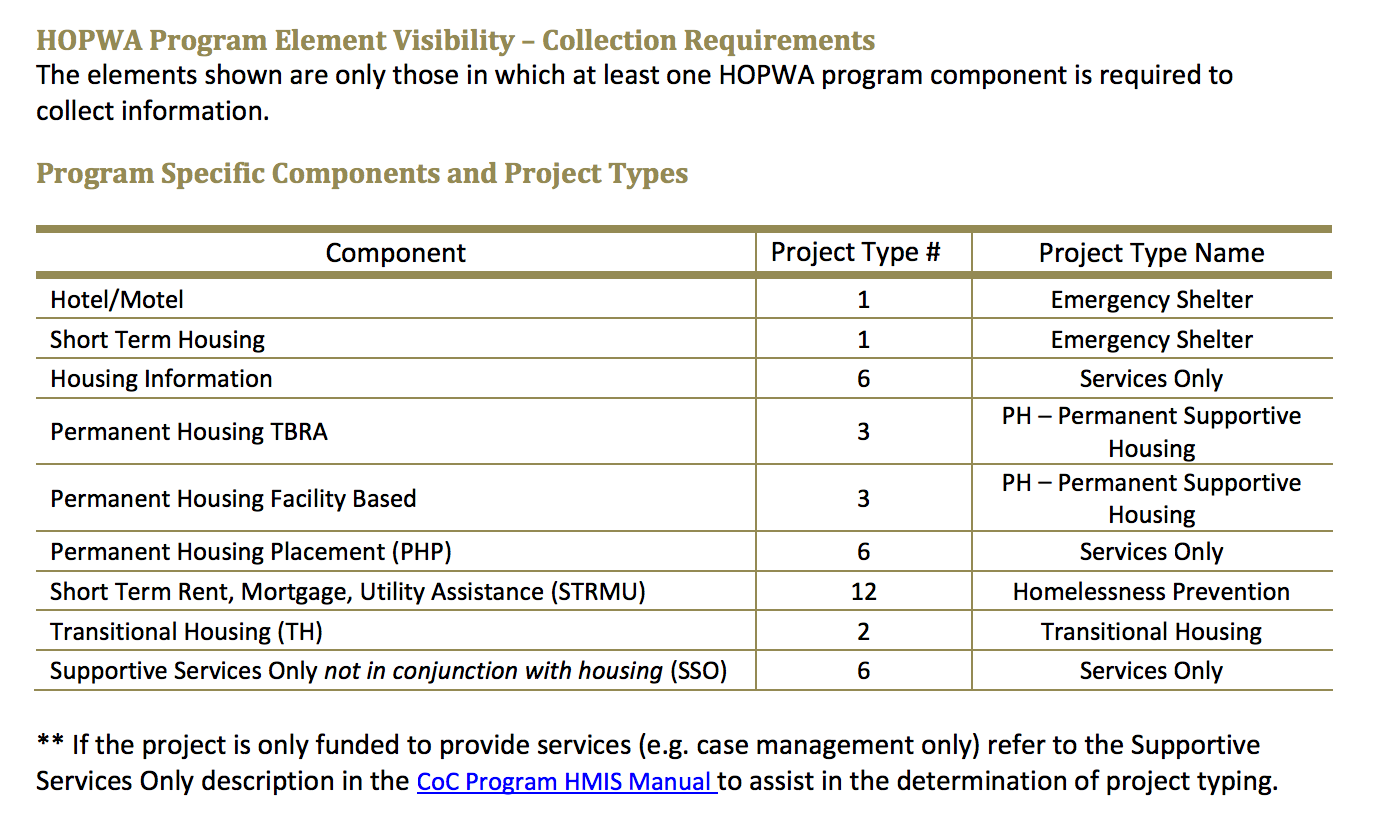

In [84]:
from IPython.display import Image, display
display(Image('images/project info.png'))

In [56]:
cities = set(project["Address City"].value_counts().index.tolist())

In [58]:
# TODO: Build a better filter than this
isnan = project.apply(lambda row: row["Address City"] not in cities, axis=1)

In [70]:
non_nan_cities = project.loc[~isnan, :]

In [72]:
non_nan_cities[non_nan_cities["Address City"] == "Menlo Park"]

,Project Name,Project ID,Organization Name,CoC Code,Project Type Code,Method for Tracking ES Utilization,Address City,Address Postal Code,Funder,Grant Start Date,Grant End Date
167,SCz-Veterans Resource Center- HP SSVF -San Mat...,3212,SCz-Veterans Resource Center- HP SSVF -San Mat...,CA-502,Homelessness Prevention (HUD),NaN,Menlo Park,94025,NaN,NaN,NaN
168,SCz-Veterans Resource Center- HP SSVF -San Mat...,3212,SCz-Veterans Resource Center- HP SSVF -San Mat...,CA-508,Homelessness Prevention (HUD),NaN,Menlo Park,94025,NaN,NaN,NaN
169,SCz-Veterans Resource Center- HP SSVF -San Mat...,3212,SCz-Veterans Resource Center- HP SSVF -San Mat...,CA-512,Homelessness Prevention (HUD),NaN,Menlo Park,94025,NaN,NaN,NaN
177,SCz-Veterans Resource Center- RRH SSVF -San Ma...,3342,SCz-Veterans Resource Center- HP SSVF -San Mat...,CA-502,PH - Rapid Re-Housing (HUD),NaN,Menlo Park,94025,NaN,NaN,NaN
178,SCz-Veterans Resource Center- RRH SSVF -San Ma...,3342,SCz-Veterans Resource Center- HP SSVF -San Mat...,CA-508,PH - Rapid Re-Housing (HUD),NaN,Menlo Park,94025,NaN,NaN,NaN
179,SCz-Veterans Resource Center- RRH SSVF -San Ma...,3342,SCz-Veterans Resource Center- HP SSVF -San Mat...,CA-512,PH - Rapid Re-Housing (HUD),NaN,Menlo Park,94025,NaN,NaN,NaN


# Analyzing enrollment and projects

So, let's first group projects together into "super-types" and then remove certain projects we're not interested in. From there, we can categorize each one of the rows in enrollment (people) based on their project super-type. From there, let's check how often people come back

In [86]:
project["Project Type Code"].value_counts(dropna=False)

Other (HUD)                                                                41
Services Only (HUD)                                                        36
Homelessness Prevention (HUD)                                              36
PH - Permanent Supportive Housing (disability required for entry) (HUD)    35
PH - Rapid Re-Housing (HUD)                                                32
Emergency Shelter (HUD)                                                    27
Transitional housing (HUD)                                                 25
Street Outreach (HUD)                                                       8
RETIRED (HUD)                                                               2
NaN                                                                         1
Name: Project Type Code, dtype: int64

In [88]:
toss_out = {"Other (HUD)", "Services Only (HUD)", "Street Outreach (HUD)", "RETIRED (HUD)"} # And NaN value
ext_funding = {"Homelessness Prevention (HUD)"}
temp_housing = {"Emergency Shelter (HUD)", "Transitional housing (HUD)"}
long_stay = {"PH - Permanent Supportive Housing (disability required for entry) (HUD)", "PH - Rapid Re-Housing (HUD)"}
